# Simulating Complex Statistics

Statistical formulas give us a basic analytical understanding of error rates vary for simple problems. Simulation-based approaches, that repeatedly draw "samples" from simulated random variables, can give us a handle on more complicated scenarios.

Basically, how to use brute-force to solve statistics problems.

## Lottery Simulation
A state lottery draws 5 numbers (1-36) on each lottery ticket. There is one winning 5 number combination and there can be multiple winners. Each ticket is costs $2. 

The prizes are as follows:
* A match of all 5 numbers in order recieves a prize of $100000

* A match of first 4 of the numbers recieves a prize of $5000

* A match of the first 3 numbers recieves a prize of $200

* A match of last 3 of the numbers recieves a prize of $50

If the state sells 100000 tickets, what is their expected profit?

### Q1. How many possible lottery tickets are there?
\begin{equation*}
60466176 = 36^5
\end{equation*}

### Q2. If computation was not an issue, how would you calculate the expected profit?
\begin{equation*}
\mathbf{E}[winning] = \sum_{i \in sold} \sum_{j \in winning} prize(i,j) \cdot  \mathbf{Pr}[{i,j}]
\end{equation*}
\begin{equation*}
\mathbf{E}[profit] = 2 \cdot 100000 - 100000 \cdot \mathbf{E}[winning]
\end{equation*}

### Q3. What assumptions would you need to make to simplify this problem?
Assume, that all tickets are equally likely and all winning numbers are equally likely.
\begin{equation*}
\mathbf{E}[winning] = \frac{1}{36^{10}} \sum_{i \in sold} \sum_{j \in winning} prize(i,j) 
\end{equation*}
The problem is that this equation is really expensive to calculate. How could we speed up the calculation?

We can further simplify this problem by noting that all winning numbers have the same prize distribution. 
You can see this by re-arranging the summations in this way:
\begin{equation*}
\mathbf{E}[winning] = \frac{1}{36^5} \sum_{j \in winning} (\frac{1}{36^5} \sum_{i \in sold}  prize(i,j))
\end{equation*}
\begin{equation*}
\mathbf{E}[winning] = \frac{1}{36^5} \sum_{i \in sold}  prize(i,j*)
\end{equation*}
for ANY j*.

Here is a good CS rule of thumb. We can exhaustively iterate over MILLIONS of data. 36^5 is reasonable to exhaustively iterate over, 36^10 is not.

In [64]:
import datetime

now = datetime.datetime.now()
for i in range(60466176):
    pass
print('Elapsed:', (datetime.datetime.now()-now).total_seconds())

Elapsed: 5.185656


In [2]:
def prize(ticket, winning_ticket):
    if ticket == winning_ticket:
        return 100000 
    
    if ticket[:4] == winning_ticket[:4]:
        return 5000
    
    if ticket[:3] == winning_ticket[:3]:
        return 200
    
        if ticket[:-3] == winning_ticket[:3]:
        return 50
    
    matches = 0
    for val in ticket:
        if val in winning_ticket:
            matches += 1
            del winning_ticket[winning_ticket.index(val)] #handle duplicates
    
    if matches == 3:
        return 50
    elif matches == 4:
        return 5000
    else:
        return 0
            
def winning():
    win_tick = [1,1,1,1,1] #can be anything!
    
    total_prize = 0
    
    for t1 in range(1,37):
        for t2 in range(1,37):
            for t3 in range(1,37):
                for t4 in range(1,37):
                    for t5 in range(1,37):
                        total_prize += prize([t1,t2,t3,t4,t5], win_tick)

    return total_prize/60466176.0

win_rate = winning()
print('Expected winning per ticket', win_rate)
print('Expected payout from state', 100000*win_rate)
print('Expected Profit', 200000 - 100000*win_rate)

Expected winning per ticket 0.006019894494402953
Expected payout from state 601.9894494402953
Expected Profit 199398.0105505597


## Election Simulation
In many more complex problems, exhaustively enumerating the outcome set is not possible. Let's consider the topical problem of election simulation. We're going to assume a model like the one in the US where there is an electoral college and the popular vote winner of each state "takes all" of the electoral votes (I know that this is not exactly true for all states, but bear with me). 

Let's first plot some existing opinion polling data for the current election. We're going to use a package called geopandas to plot a map of the 50 states.

In [3]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

usa_map = gpd.read_file('states.shp')
usa_map.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


For each of these states, we have polling data.

In [65]:
survey_monkey = pd.read_csv('survey_monkey2.csv')
survey_monkey

,STATE_NAME,BIDEN,TRUMP,K
0,Alaska,44,54,112
1,Hawaii,64,34,118
2,California,62,36,2223
3,Oregon,61,37,493
4,Idaho,40,48,167
5,Washington,61,37,736
6,Montana,45,52,126
7,Wyoming,31,67,65
8,Nevada,51,48,301
9,Arizona,53,46,556


In [52]:
survey_monkey['K'].sum() #total number of samples

23861

### Q1. Plot All of the States 
In our first question, we will plot all of the states in this notebook.

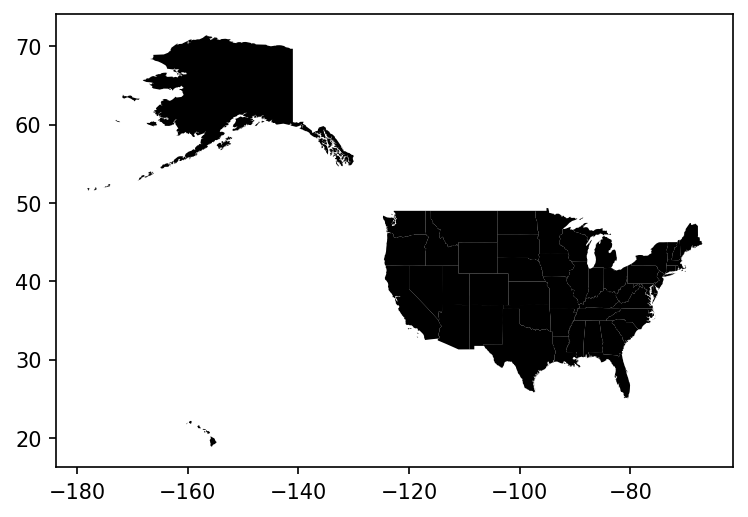

In [24]:
#fig =plt.figure(figsize=(30,30), dpi= 100, facecolor='w', edgecolor='k')
plt.rcParams['figure.dpi'] = 150
usa_map.plot(color='k')

We can color code this plot by the actual polling data.

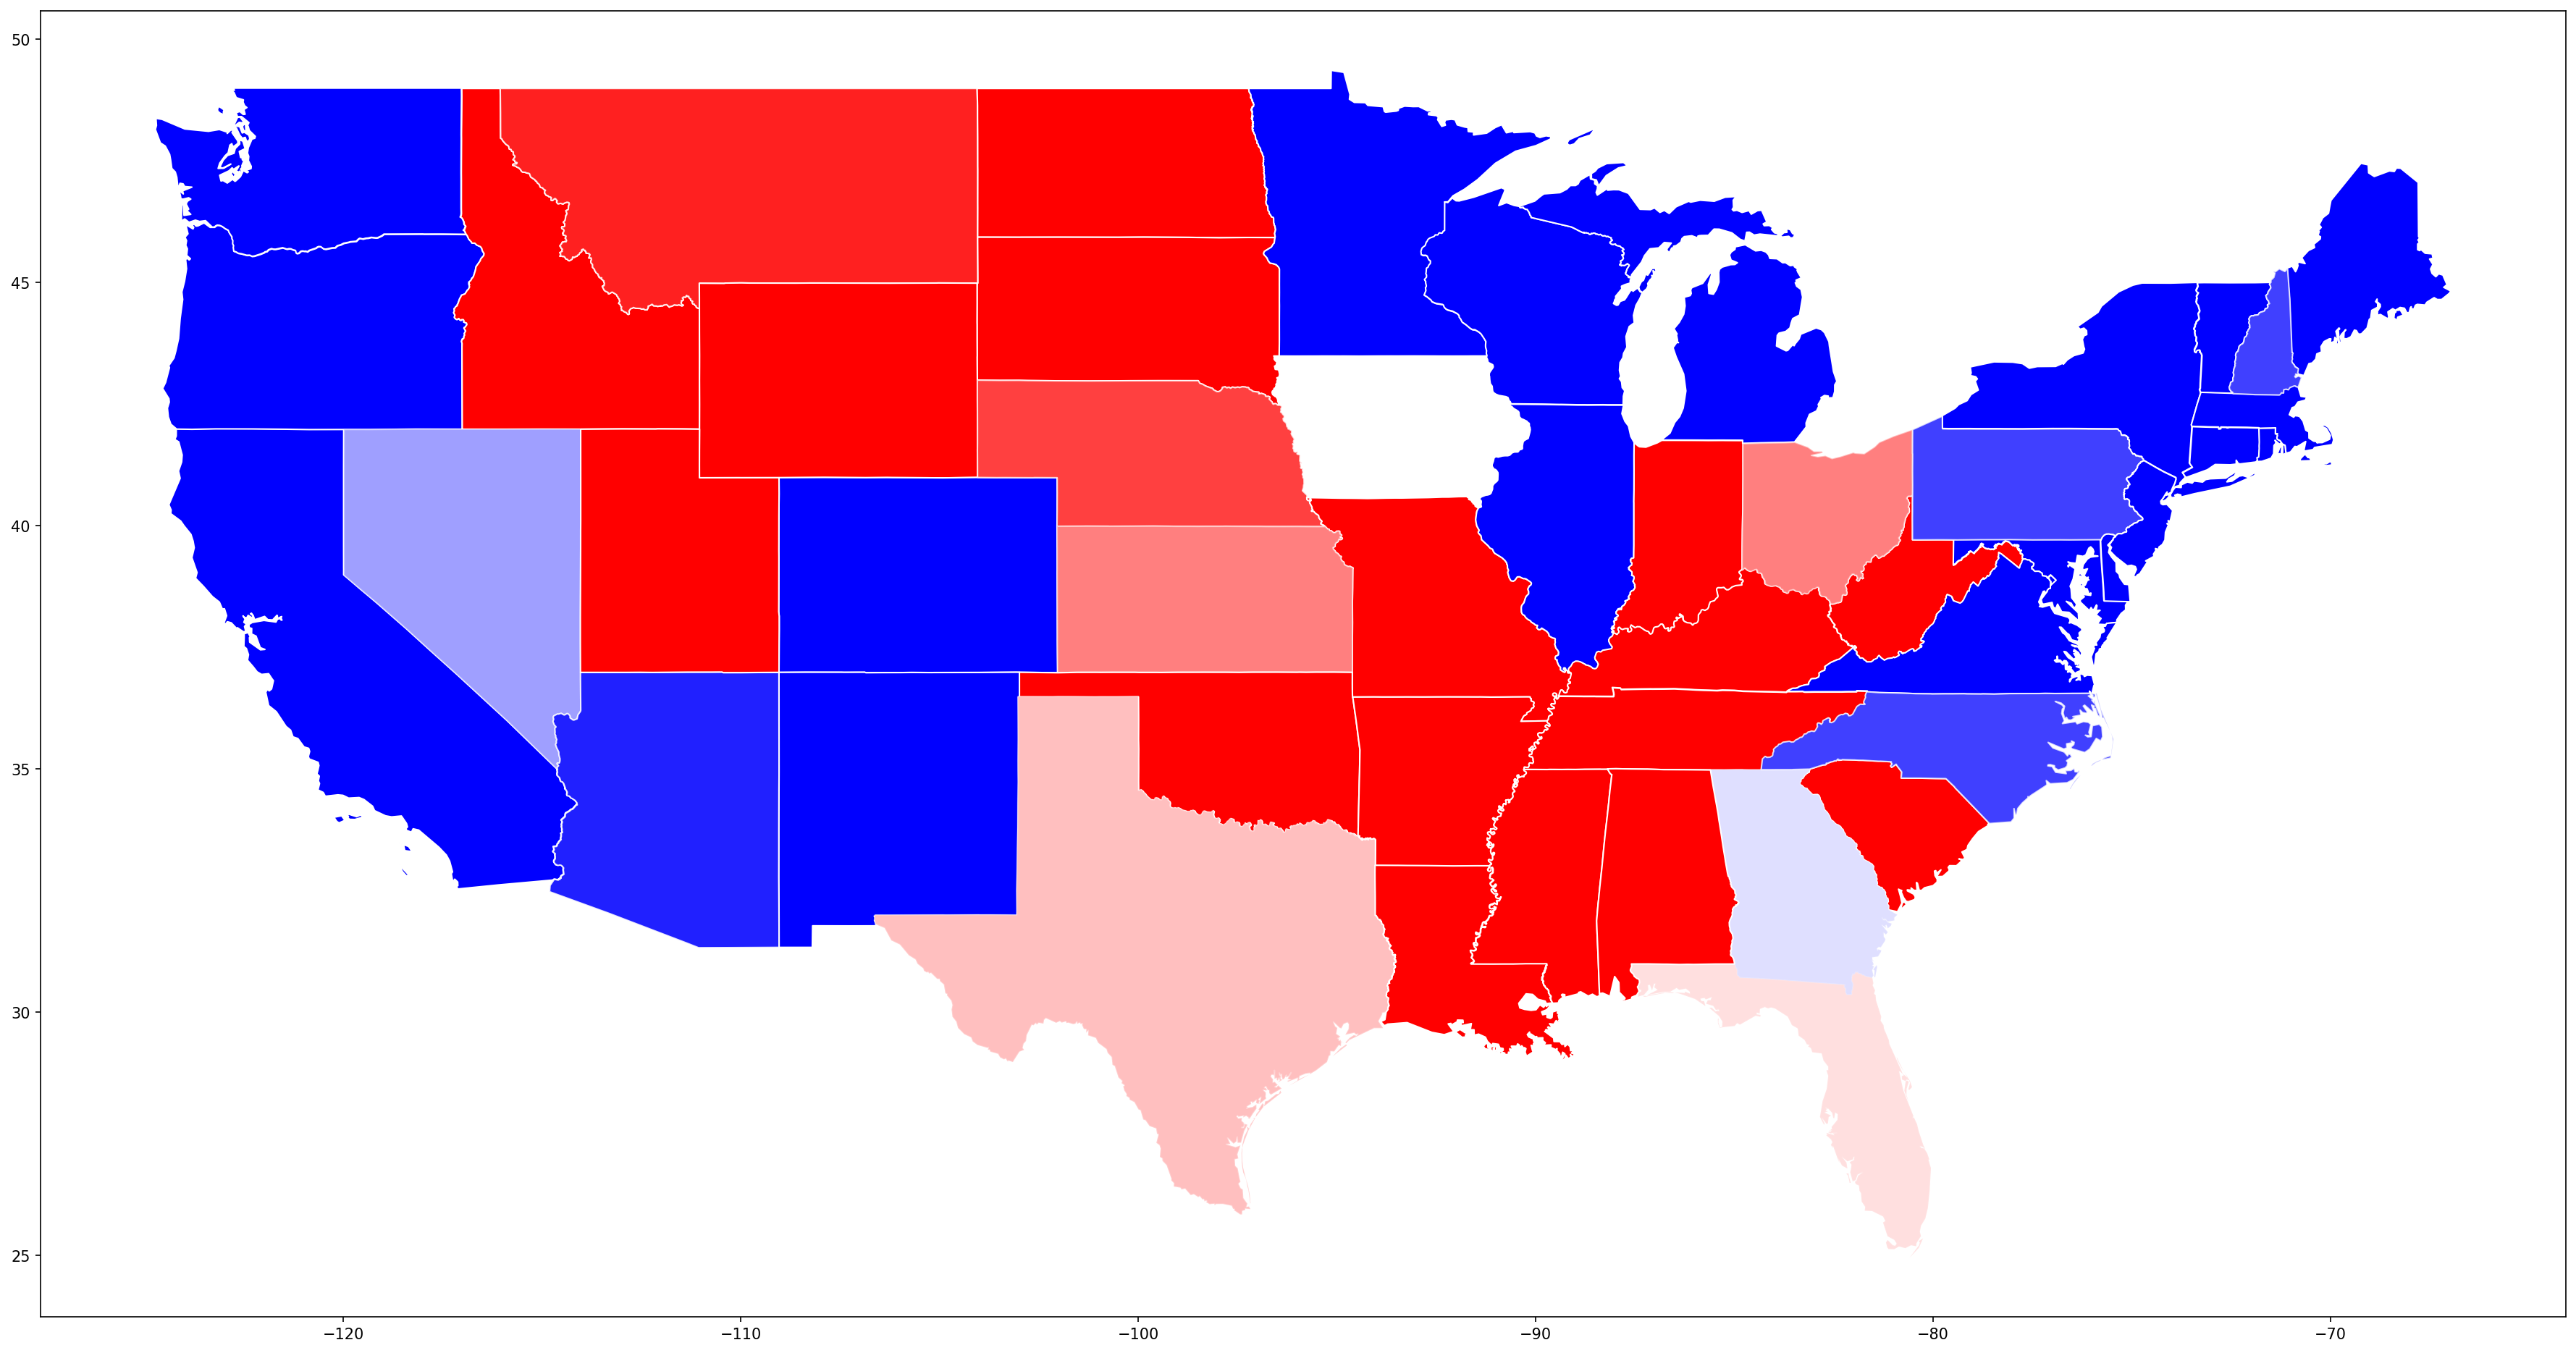

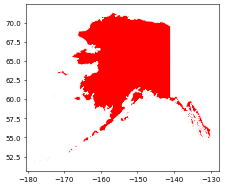

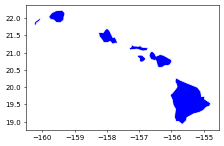

In [25]:
#plot states based on polling results
fig, ax = plt.subplots(figsize=(30,30))
fig_ak, ax_ak = plt.subplots(figsize=(5,5), dpi=50)
fig_hi, ax_hi = plt.subplots(figsize=(5,5), dpi=50)

for i in range(len(survey_monkey)):
    record = survey_monkey.iloc[i]
    
    if record.STATE_NAME == 'Alaska':
        ax_c = ax_ak
    elif record.STATE_NAME == 'Hawaii':
        ax_c = ax_hi
    else:
        ax_c = ax  
    
    if record.BIDEN > record.TRUMP:
        
        if (record.BIDEN - record.TRUMP) > 8:
            alpha = 1.0
        else:
            alpha = (record.BIDEN - record.TRUMP)/8.0
        
        usa_map[usa_map.STATE_NAME == record['STATE_NAME']].plot(ax = ax_c, color='b',alpha=alpha, edgecolor='w')
    else:
        
        if (record.TRUMP - record.BIDEN) > 8:
            alpha = 1.0
        else:
            alpha = (record.TRUMP - record.BIDEN)/8.0
            
        usa_map[usa_map.STATE_NAME == record['STATE_NAME']].plot(ax = ax_c, color='r',alpha=alpha, edgecolor='w')

### Q2. Integrate Electoral College Data
Next, we will integrate electoral college data with this data. 

In [66]:
electoral_college = pd.read_csv('electoral_college.csv')
electoral_college

,STATE_NAME,EC
0,Alabama,9
1,Alaska,3
2,Arizona,11
3,Arkansas,6
4,California,55
5,Colorado,9
6,Connecticut,7
7,District of Columbia,3
8,Delaware,3
9,Florida,29


In [54]:
merged = survey_monkey.merge(electoral_college)
merged.head()

,STATE_NAME,BIDEN,TRUMP,K,EC
0,Alaska,44,54,112,3
1,Hawaii,64,34,118,4
2,California,62,36,2223,55
3,Oregon,61,37,493,7
4,Idaho,40,48,167,4


In [55]:
merged['Strong_Biden'] = (merged['BIDEN'] - merged['TRUMP']) >= 8
merged['Strong_Trump'] = (merged['BIDEN'] - merged['TRUMP']) <= -8

print('Likely Biden: ', (merged['Strong_Biden']*merged['EC']).sum())
print('Likely Trump: ', (merged['Strong_Trump']*merged['EC']).sum())

Likely Biden:  237
Likely Trump:  112


### Q3. Find All Toss Up States
We can use the merged data frame to find all of the toss up states

In [56]:
toss_up = merged[~(merged['Strong_Biden'] | merged['Strong_Trump'])]
toss_up.head()

,STATE_NAME,BIDEN,TRUMP,K,EC,Strong_Biden,Strong_Trump
6,Montana,45,52,126,3,False,False
8,Nevada,51,48,301,6,False,False
9,Arizona,53,46,556,11,False,False
13,Nebraska,46,52,177,5,False,False
17,Iowa,49,49,276,6,False,False


### Q4. Let's simulate different scenarios for the toss up states
First, let's figure out the odds that that apparent winner in the poll "flips". An odds ratio is a ratio of two probabilities. In this case, we look at the odds compared to a 50-50 toss up (i.e., betting odds).

In [57]:
import scipy.stats as st
import numpy as np

#plot states based on polling results
#fig, ax = plt.subplots(figsize=(30,30))
#fig_ak, ax_ak = plt.subplots(figsize=(5,5), dpi=50)
#fig_hi, ax_hi = plt.subplots(figsize=(5,5), dpi=50)

for i in range(len(toss_up)):
    record = toss_up.iloc[i]
    
    SE = 1/(2*np.sqrt(record.K))
    
    diff = np.abs(record.TRUMP - record.BIDEN)/100
    odds = st.norm.cdf(diff/SE)
    
    print('Odds of flipped result for', record.STATE_NAME  ,' 1 to', 0.5/(1-odds))
    
    #usa_map[usa_map.STATE_NAME == record['STATE_NAME']].plot(ax = ax_c, color='k',alpha=odds, edgecolor='w')

Odds of flipped result for Montana  1 to 8.615679264325767
Odds of flipped result for Nevada  1 to 3.356903212420565
Odds of flipped result for Arizona  1 to 1038.5409025328936
Odds of flipped result for Nebraska  1 to 9.059771345371898
Odds of flipped result for Iowa  1 to 1.0
Odds of flipped result for Kansas  1 to 6.397685569375022
Odds of flipped result for Texas  1 to 7.886180844940168
Odds of flipped result for Wisconsin  1 to 2.5109774695088567
Odds of flipped result for Michigan  1 to 1.0
Odds of flipped result for Ohio  1 to 170.3782158685344
Odds of flipped result for Georgia  1 to 1.6434499331627603
Odds of flipped result for Florida  1 to 7.474555633975837
Odds of flipped result for Pennsylvania  1 to 86.99721864961569
Odds of flipped result for New Hampshire  1 to 7.89428967554416
Odds of flipped result for North Carolina  1 to 3.771266395279447


In [67]:
def one_run():
    TRUMP = 0
    BIDEN = 0
    
    for i in range(len(toss_up)):
        record = toss_up.iloc[i]

        SE = 1/(2*np.sqrt(record.K))

        diff = np.abs(record.TRUMP - record.BIDEN)/100
        simdiff = np.random.randn(1)*SE - diff
        
        if simdiff > 0:
            #flip
            if record.TRUMP > record.BIDEN:
                BIDEN += record.EC
            else:
                TRUMP += record.EC
        else: 
            
            if record.TRUMP < record.BIDEN:
                BIDEN += record.EC
            else:
                TRUMP += record.EC
                
    return BIDEN+237, TRUMP+112

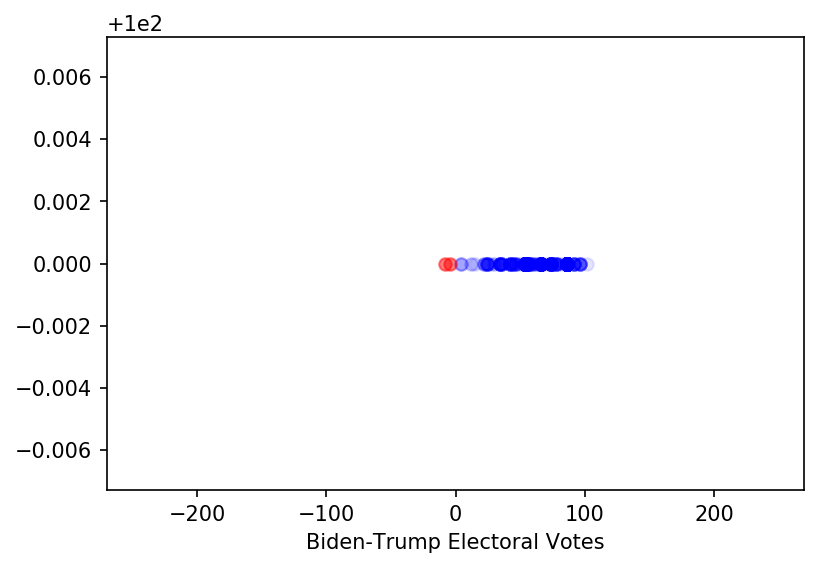

In [68]:
plt.xlabel('Biden-Trump Electoral Votes')
plt.xlim([-270,270])

for i in range(1000):
    biden, trump = one_run()
    
    if biden > trump:
        plt.scatter([biden - trump], [100] ,c='b', alpha=0.05)
    else:
        plt.scatter([biden - trump], [100],c='r', alpha=0.5)